# Week 1 Practical

In [1]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Print the graph
print(G)

Graph with 0 nodes and 0 edges


In [2]:
# BEGIN: Cell 2

# Add node "A" to the graph
G.add_node("A")

# Print the graph
print(G)

# Add multiple nodes "B" to "G" to the graph
nodes = ["B", "C", "D", "E", "F", "G"]
G.add_nodes_from(nodes)

# Print the graph
print(G)

# END: Cell 2

Graph with 1 nodes and 0 edges
Graph with 7 nodes and 0 edges


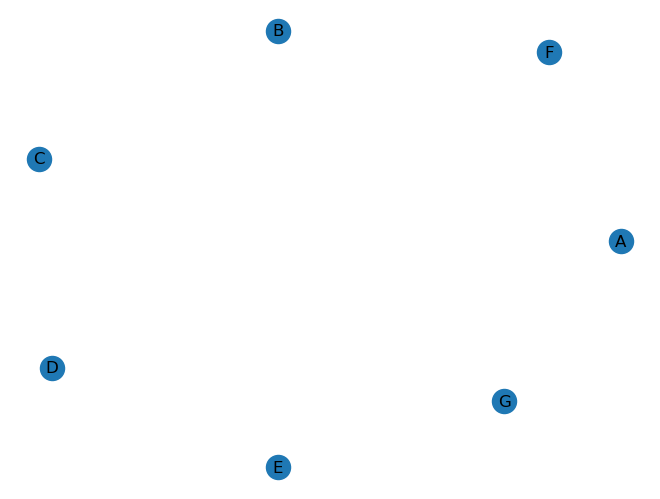

In [3]:
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

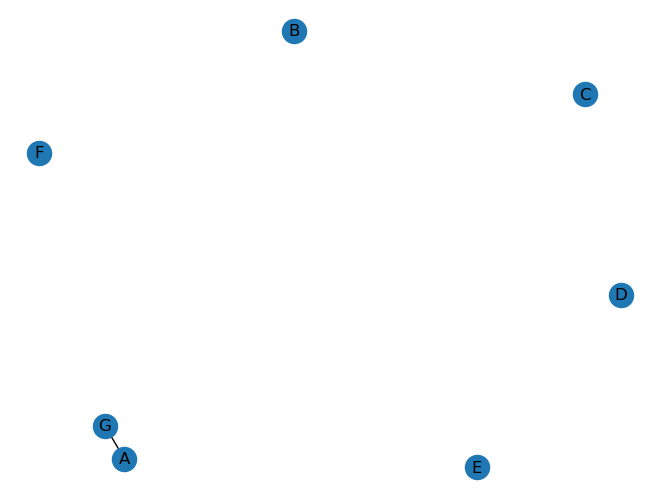

In [4]:
# Add an edge between nodes "A" and "G"
G.add_edge("A", "G")

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

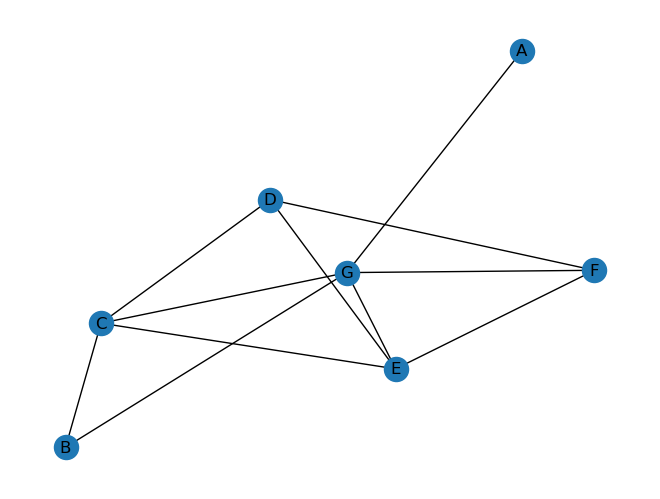

In [5]:
# List of tuples representing the edges
edges = [("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"), ("F", "G"), ("G", "B"), ("C", "E"), ("D", "F"), ("E", "G"), ("G", "C")]

# Add the edges to the graph
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

In [6]:
# Planar graphs are graphs that can be drawn on a plane without any edges crossing.
# The above graph is a planar graph.
# If we can shift vertice E into the middle of GCDF, we can see that the edges do not cross.

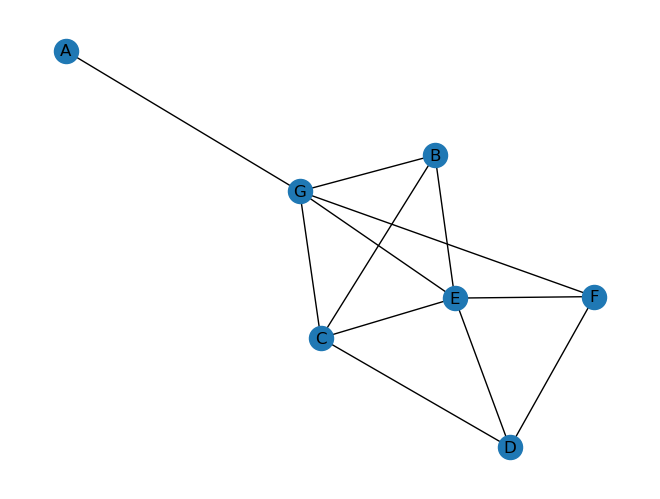

In [7]:
G.add_edge("B", "E")

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

In [8]:
adj_matrix = nx.adjacency_matrix(G)
# .todense() converts the sparse matrix to a dense matrix, making it more readable
print(adj_matrix.todense())

[[0 0 0 0 0 0 1]
 [0 0 1 0 1 0 1]
 [0 1 0 1 1 0 1]
 [0 0 1 0 1 1 0]
 [0 1 1 1 0 1 1]
 [0 0 0 1 1 0 1]
 [1 1 1 0 1 1 0]]


In [9]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [10]:

adj_matrix_product = adj_matrix.dot(adj_matrix)

print(adj_matrix_product.todense())

[[1 1 1 0 1 1 0]
 [1 3 2 2 2 2 2]
 [1 2 4 1 3 3 2]
 [0 2 1 3 2 1 3]
 [1 2 3 2 5 2 3]
 [1 2 3 1 2 3 1]
 [0 2 2 3 3 1 5]]


In [11]:
adj_matrix_cube = adj_matrix.dot(adj_matrix).dot(adj_matrix)
print(adj_matrix_cube.todense())

[[ 0  2  2  3  3  1  5]
 [ 2  6  9  6 11  6 10]
 [ 2  9  8 10 12  6 13]
 [ 3  6 10  4 10  8  6]
 [ 3 11 12 10 12 10 13]
 [ 1  6  6  8 10  4 11]
 [ 5 10 13  6 13 11  8]]


In [12]:
# The cell above is counting the number of "triangles" in the graph.
# The diagonal divide by 2 is the number of triangles the node participated in.

In [13]:
import random

# Generate a random weight for each vertice
weights = [random.random() for _ in range(len(G.nodes()))]

# Add "weights" as an attribute to each vertice
nx.set_node_attributes(G, {node: weight for node, weight in zip(G.nodes(), weights)}, "weight")


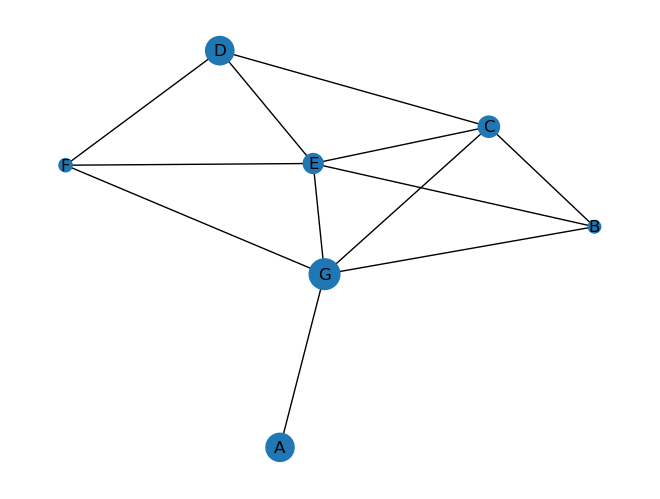

In [14]:
import matplotlib.pyplot as plt

# Set the node sizes based on the vertex weights
node_sizes = [weight * 500 for weight in weights]

# Draw the graph with adjusted node sizes
nx.draw(G, with_labels=True, node_size=node_sizes)

# Show the plot
plt.show()

## Section 2 of practical

In [15]:
# Import the csv files in data
import pandas as pd

contacts = pd.read_csv("data/rfid_lyon_contacts.csv")
people = pd.read_csv("data/rfid_lyon_people.csv")

In [16]:
import networkx as nx

# Create an empty multigraph
multigraph = nx.MultiGraph()

# Add edges from the 'contacts' dataframe with 'time' as edge attribute
multigraph = nx.from_pandas_edgelist(contacts, 'ID1', 'ID2', edge_attr='time', create_using=multigraph)

# Add the 'status' attribute to each vertex
nx.set_node_attributes(multigraph, people.set_index('ID')['status'].to_dict(), 'status')

In [17]:
multigraph.nodes(data=True)

NodeDataView({15: {'status': 'MED'}, 31: {'status': 'ADM'}, 22: {'status': 'MED'}, 16: {'status': 'MED'}, 11: {'status': 'MED'}, 14: {'status': 'MED'}, 3: {'status': 'NUR'}, 37: {'status': 'NUR'}, 5: {'status': 'NUR'}, 6: {'status': 'NUR'}, 7: {'status': 'NUR'}, 1: {'status': 'ADM'}, 20: {'status': 'NUR'}, 17: {'status': 'NUR'}, 8: {'status': 'NUR'}, 23: {'status': 'NUR'}, 10: {'status': 'NUR'}, 13: {'status': 'NUR'}, 19: {'status': 'ADM'}, 18: {'status': 'MED'}, 24: {'status': 'NUR'}, 45: {'status': 'PAT'}, 40: {'status': 'PAT'}, 44: {'status': 'PAT'}, 68: {'status': 'PAT'}, 69: {'status': 'PAT'}, 21: {'status': 'NUR'}, 36: {'status': 'NUR'}, 48: {'status': 'PAT'}, 38: {'status': 'PAT'}, 42: {'status': 'PAT'}, 47: {'status': 'PAT'}, 9: {'status': 'MED'}, 12: {'status': 'MED'}, 49: {'status': 'PAT'}, 41: {'status': 'PAT'}, 66: {'status': 'PAT'}, 51: {'status': 'PAT'}, 70: {'status': 'PAT'}, 52: {'status': 'PAT'}, 32: {'status': 'NUR'}, 34: {'status': 'NUR'}, 67: {'status': 'PAT'}, 27: 

In [18]:
print(type(multigraph))
print(multigraph.is_multigraph())
print(multigraph)

<class 'networkx.classes.multigraph.MultiGraph'>
True
MultiGraph with 75 nodes and 32424 edges


In [19]:
# Convert multigraph to simple graph
simple_graph = nx.Graph(multigraph)

# Add edge attribute "count" based on the number of multi-edges
for u, v, key, data in multigraph.edges(keys=True, data=True):
    count = multigraph.number_of_edges(u, v)
    simple_graph[u][v]['count'] = count

In [20]:
print(simple_graph)

Graph with 75 nodes and 1139 edges


In [21]:
simple_graph.edges(data=True)

EdgeDataView([(15, 31, {'time': 140, 'count': 1}), (15, 22, {'time': 107160, 'count': 359}), (15, 16, {'time': 279460, 'count': 156}), (15, 1, {'time': 345460, 'count': 69}), (15, 18, {'time': 278160, 'count': 16}), (15, 14, {'time': 333980, 'count': 42}), (15, 11, {'time': 346500, 'count': 309}), (15, 23, {'time': 256720, 'count': 32}), (15, 44, {'time': 164920, 'count': 37}), (15, 68, {'time': 168360, 'count': 3}), (15, 19, {'time': 176220, 'count': 3}), (15, 12, {'time': 265120, 'count': 123}), (15, 9, {'time': 341060, 'count': 189}), (15, 45, {'time': 248480, 'count': 43}), (15, 17, {'time': 272460, 'count': 49}), (15, 6, {'time': 340320, 'count': 23}), (15, 5, {'time': 334500, 'count': 17}), (15, 7, {'time': 339540, 'count': 19}), (15, 40, {'time': 172560, 'count': 22}), (15, 27, {'time': 177200, 'count': 3}), (15, 4, {'time': 335280, 'count': 6}), (15, 35, {'time': 346380, 'count': 272}), (15, 49, {'time': 254940, 'count': 38}), (15, 37, {'time': 344460, 'count': 57}), (15, 38, {

/tmp/ipykernel_12965/299266027.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(status_values))


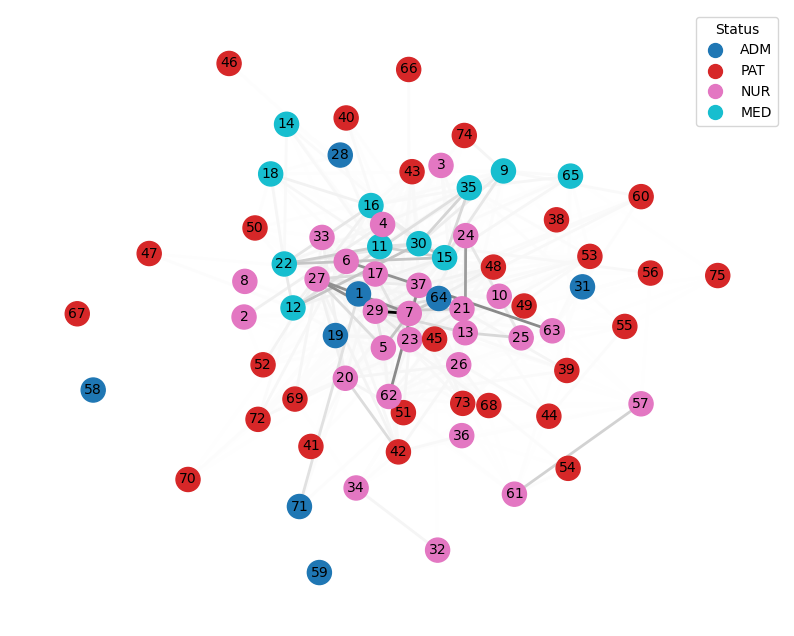

In [22]:
import networkx as nx

import matplotlib.pyplot as plt

# Define a color map for the nodes based on their unique statuses
status_values = set(nx.get_node_attributes(simple_graph, 'status').values())
color_map = plt.cm.get_cmap('tab10', len(status_values))
node_colors = [color_map(i) for i in range(len(status_values))]
node_color_dict = {status: color for status, color in zip(status_values, node_colors)}

# Determine the maximum value of the edge attribute 'count'
max_count = max(nx.get_edge_attributes(simple_graph, 'count').values())

# Set up the visualization
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
pos = nx.spring_layout(simple_graph)

# Draw the nodes with colors corresponding to their statuses
nx.draw_networkx_nodes(simple_graph, pos, node_color=[node_color_dict[status] for status in nx.get_node_attributes(simple_graph, 'status').values()], node_size=300)

# Sort the edges by their 'count' attribute and color them in shades of grey
edges = sorted(simple_graph.edges(data=True), key=lambda x: x[2]['count'])
edge_colors = [plt.cm.Greys(count['count'] / max_count) for _, _, count in edges]
nx.draw_networkx_edges(simple_graph, pos, edgelist=edges, edge_color=edge_colors, width=2)

# Add labels for nodes with a specified font size
nx.draw_networkx_labels(simple_graph, pos, font_size=10)

# Create a legend to explain the node color coding
legend_handles = [plt.Line2D([], [], marker='o', markersize=10, color=color, linestyle='None', label=status) for status, color in node_color_dict.items()]
plt.legend(handles=legend_handles, title='Status')

# Turn off the axis to clean up the visualization
ax.axis('off')

# Show the plot
plt.show()

## Extract componenets from graph

In [23]:
simple_graph.edges(data=True)

EdgeDataView([(15, 31, {'time': 140, 'count': 1}), (15, 22, {'time': 107160, 'count': 359}), (15, 16, {'time': 279460, 'count': 156}), (15, 1, {'time': 345460, 'count': 69}), (15, 18, {'time': 278160, 'count': 16}), (15, 14, {'time': 333980, 'count': 42}), (15, 11, {'time': 346500, 'count': 309}), (15, 23, {'time': 256720, 'count': 32}), (15, 44, {'time': 164920, 'count': 37}), (15, 68, {'time': 168360, 'count': 3}), (15, 19, {'time': 176220, 'count': 3}), (15, 12, {'time': 265120, 'count': 123}), (15, 9, {'time': 341060, 'count': 189}), (15, 45, {'time': 248480, 'count': 43}), (15, 17, {'time': 272460, 'count': 49}), (15, 6, {'time': 340320, 'count': 23}), (15, 5, {'time': 334500, 'count': 17}), (15, 7, {'time': 339540, 'count': 19}), (15, 40, {'time': 172560, 'count': 22}), (15, 27, {'time': 177200, 'count': 3}), (15, 4, {'time': 335280, 'count': 6}), (15, 35, {'time': 346380, 'count': 272}), (15, 49, {'time': 254940, 'count': 38}), (15, 37, {'time': 344460, 'count': 57}), (15, 38, {

In [24]:
# Create a copy of the simple graph
subgraph = simple_graph.copy()

# Remove edges with count attribute <= 50
edges_to_remove = [(u, v, data) for u, v, data in subgraph.edges(data=True) if data['count'] <= 50]
subgraph.remove_edges_from(edges_to_remove)

# Print all components along with their members
components = nx.connected_components(subgraph)
for i, component in enumerate(components):
    print(f"Component {i+1}: {component}")

Component 1: {1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 39, 40, 42, 43, 44, 45, 48, 49, 51, 52, 53, 56, 60, 62, 63, 64, 65, 68, 69, 71, 72, 73, 74}
Component 2: {31}
Component 3: {8}
Component 4: {38}
Component 5: {47}
Component 6: {41}
Component 7: {66}
Component 8: {70}
Component 9: {32, 34}
Component 10: {67}
Component 11: {46}
Component 12: {2, 4}
Component 13: {50}
Component 14: {54}
Component 15: {57, 61}
Component 16: {55}
Component 17: {59}
Component 18: {58}
Component 19: {75}


/tmp/ipykernel_12965/1204576743.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(component_values))


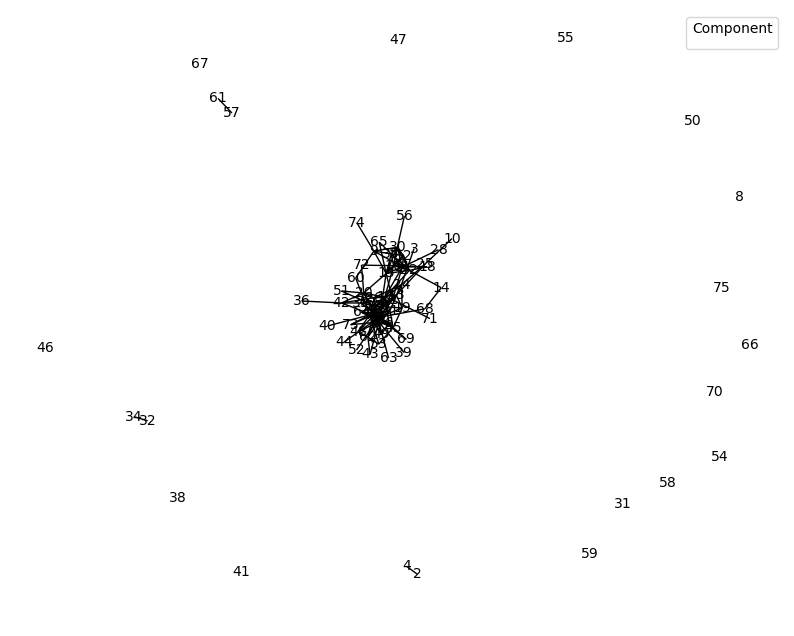

In [25]:
import networkx as nx

import matplotlib.pyplot as plt

# Set up the visualization
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Define a color map for the nodes based on their components
component_values = set(nx.get_node_attributes(subgraph, 'component').values())
color_map = plt.cm.get_cmap('tab10', len(component_values))
node_colors = [color_map(i) for i in range(len(component_values))]
node_color_dict = {component: color for component, color in zip(component_values, node_colors)}

# Set the layout of the graph
pos = nx.spring_layout(subgraph)

# Draw the nodes with colors corresponding to their components
nx.draw_networkx_nodes(subgraph, pos, node_color=[node_color_dict[component] for component in nx.get_node_attributes(subgraph, 'component').values()], node_size=300)

# Draw the edges
nx.draw_networkx_edges(subgraph, pos)

# Add labels for nodes with a specified font size
nx.draw_networkx_labels(subgraph, pos, font_size=10)

# Create a legend to explain the node color coding
legend_handles = [plt.Line2D([], [], marker='o', markersize=10, color=color, linestyle='None', label=component) for component, color in node_color_dict.items()]
plt.legend(handles=legend_handles, title='Component')

# Turn off the axis to clean up the visualization
ax.axis('off')

# Show the plot
plt.show()

## Bipartite graph

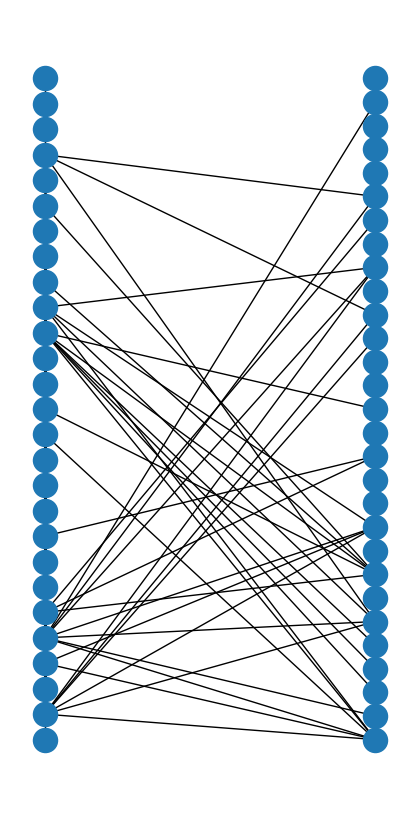

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the subgraph with nodes that are either "NUR" or "PAT"
G_bipartite = subgraph.subgraph(
    [node for node, data in subgraph.nodes(data=True) if data['status'] in ['NUR', 'PAT']]
).copy()

# Plotting
plt.figure(figsize=(4, 8), dpi=100)

# Set the layout algorithm to bipartite layout
nur_nodes = [node for node, data in G_bipartite.nodes(data=True) if data['status'] == 'NUR']
pos = nx.bipartite_layout(G_bipartite, nur_nodes)

# Draw the labels
nx.draw(G_bipartite, pos)

plt.show()

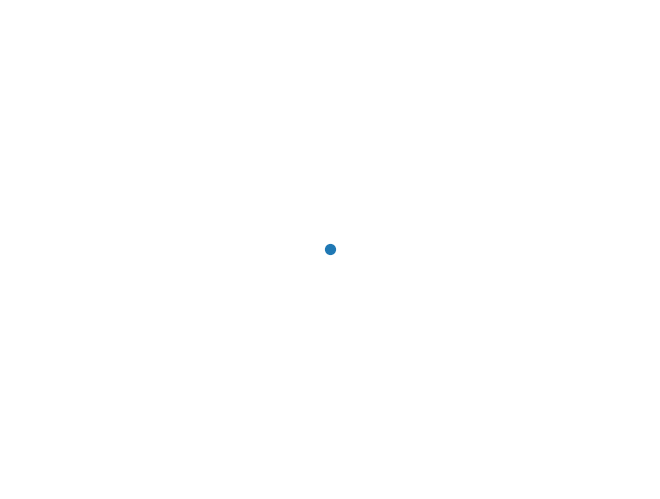

In [27]:
import random
import networkx as nx

def simulate_epidemic(G, p):
    """
    Simulates the spread of a disease through a population represented by a graph G,
    with each edge representing a possible transmission with probability p.
    
    Parameters:
    G (networkx.Graph or networkx.MultiGraph): The graph representing the population.
    p (float): The probability of infection transmission through an edge.
    
    Returns:
    networkx.Graph: The infection tree representing the spread of the disease.
    """
    # Set all nodes to 'susceptible'
    for node in G.nodes():
        G.nodes[node]['disease_status'] = 'susceptible'

    # Create an empty graph for the infection tree
    T = nx.Graph()

    # Pick a random vertex and infect it
    random_vertex = random.choice(list(G.nodes()))
    T.add_node(random_vertex)
    G.nodes[random_vertex]['disease_status'] = 'infected'

    # Set of currently infected nodes
    infected_set = set([random_vertex])

    while True:
        if not infected_set:
            break
        
        # Pick a random infected vertex
        infected_vertex = random.choice(list(infected_set))
        
        # Get the edges connected to the infected vertex
        edges = list(G.edges(infected_vertex))
        
        # Infect each neighbor via each edge with a probability p
        for edge in edges:
            neighbor = edge[1] if edge[0] == infected_vertex else edge[0]
            if G.nodes[neighbor]['disease_status'] == 'susceptible' and random.random() < p:
                G.nodes[neighbor]['disease_status'] = 'infected'
                T.add_edge(infected_vertex, neighbor)
                infected_set.add(neighbor)
        
        # Set the current infected vertex to recovered
        G.nodes[infected_vertex]['disease_status'] = 'recovered'
        infected_set.remove(infected_vertex)
    
    return T

# Example usage:
p = 0.07  # Define the infection probability
T = simulate_epidemic(subgraph, p)

# Draw the tree T using planar_layout
if len(T) == 1:
    pos = {list(T.nodes())[0]: (0, 0)}
else:
    pos = nx.bfs_layout(T, list(T.nodes())[0])

# Draw the tree with labels
nx.draw(T, pos, with_labels=False, node_size=50, arrows=True, arrowstyle='->', arrowsize=5)

Probability of an epidemic (size > 0): 0.75


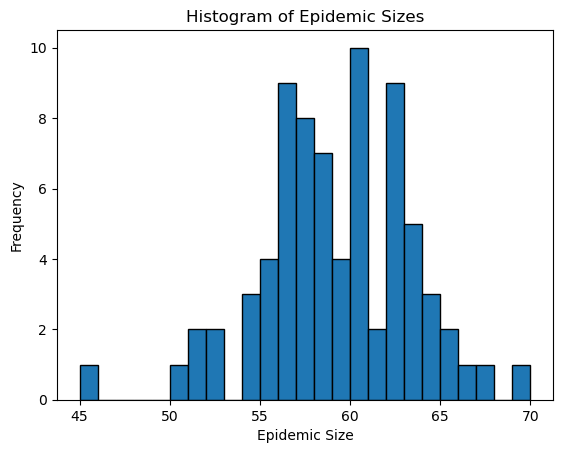

In [28]:
epidemic_sizes = []  # List to store the final size of the epidemic
p = 0.07
epidemic_threshold = 20

for _ in range(100):
  # Run the simulation code here
  T = simulate_epidemic(simple_graph, p)
  # Assuming the final size of the epidemic is stored in variable 'T'
  epidemic_sizes.append(len(T))

epidemic_count = sum(1 for size in epidemic_sizes if size > epidemic_threshold)
probability = epidemic_count / len(epidemic_sizes)
print("Probability of an epidemic (size > 0):", probability)

# Filter out the epidemic sizes that are not equal to 1
filtered_sizes = [size for size in epidemic_sizes if size > epidemic_threshold]

# Plot the histogram
plt.hist(filtered_sizes, bins=range(min(filtered_sizes), max(filtered_sizes) + 2), edgecolor='black')

# Set the labels and title
plt.xlabel('Epidemic Size')
plt.ylabel('Frequency')
plt.title('Histogram of Epidemic Sizes')

# Display the histogram
plt.show()